<a href="https://colab.research.google.com/github/Thibautsdk/IAE_METZ_DATA_2025_SANDROCK_DASILVA/blob/main/Fonds_OBLI_Taux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 : collecte des donnees

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.4 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from arch import arch_model
from datetime import datetime



# Liste des fonds (codes Yahoo Finance)
fonds = ['0P00000B2L.F', '0P0001F55U.F', 'MTDD.DE', '0P0000I0MR.F', '0P0000YRQ7.F', 'MTD.PA',
         '0P0000223Q.F', '0P000160S2.F', '0P0001KAEG.F', '0P0000GAN0.F']

# Créer un DataFrame pour stocker les données mensuelles
adj_close_monthly = pd.DataFrame()

# Boucle sur chaque ticker pour télécharger les données
for ticker in fonds:
    try:
        # Télécharger les données pour le ticker
        data = yf.download(ticker, start="2022-03-01", end="2025-03-01")

        # Vérifier si les données ont été téléchargées
        if not data.empty:
            # Extraire 'Adj Close' ou 'Close'
            if 'Adj Close' in data.columns:
                prices = data['Adj Close']
            elif 'Close' in data.columns:
                prices = data['Close']
            else:
                print(f"Aucune donnée de prix disponible pour {ticker}")
                continue

            # Convertir en données mensuelles (dernier prix de chaque mois)
            prices_monthly = prices.resample('M').last()

            # Ajouter les données mensuelles au DataFrame final
            adj_close_monthly[ticker] = prices_monthly
        else:
            print(f"Aucune donnée trouvée pour {ticker}")
    except Exception as e:
        print(f"Erreur lors du téléchargement des données pour {ticker} : {e}")

# Afficher les prix mensuels
if not adj_close_monthly.empty:
    print("Prix mensuels :")
    print(adj_close_monthly)
else:
    print("Aucune donnée valide n'a été trouvée pour les fonds spécifiés.")








[*********************100%***********************]  1 of 1 completed
<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['0P0001F55U.F']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1

Aucune donnée trouvée pour 0P0001F55U.F


[*********************100%***********************]  1 of 1 completed
<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed

Prix mensuels :
            0P00000B2L.F     MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F      MTD.PA  \
Date                                                                           
2022-03-31    275.059998  163.991394        15.594      8.368308  176.919998   
2022-04-30    267.790009  157.718826        15.094      7.814798  170.009995   
2022-05-31    265.250000  155.221268        14.789      7.523973  167.509995   
2022-06-30    258.980011  152.446213        14.501      6.895410  164.539993   
2022-07-31    267.000000  159.223572        15.011      7.214383  171.839996   
2022-08-31    253.630005  150.214188        14.364      7.176856  161.919998   
2022-09-30    243.800003  143.769272        13.781      6.651491  155.130005   
2022-10-31    243.970001  144.550186        13.831      6.829741  155.740005   
2022-11-30    249.149994  147.519562        14.122      6.820358  159.100006   
2022-12-31    241.619995  140.798447        13.544      6.642109  151.740005   
2023-01-31    245.550003


<ipython-input-26-64cfe3a98bc8>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()


#2 : analyse des rendements

Rendements mensuels :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043497      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078     -0.020702     -0.030665  
2022-05-31     -0.009851     -0.007707     -0.007340     -0.011226  
2022-06-30     -0.036414     -0.028965     -0.028575     -0.044965  
2022-07-31      0.017859      0

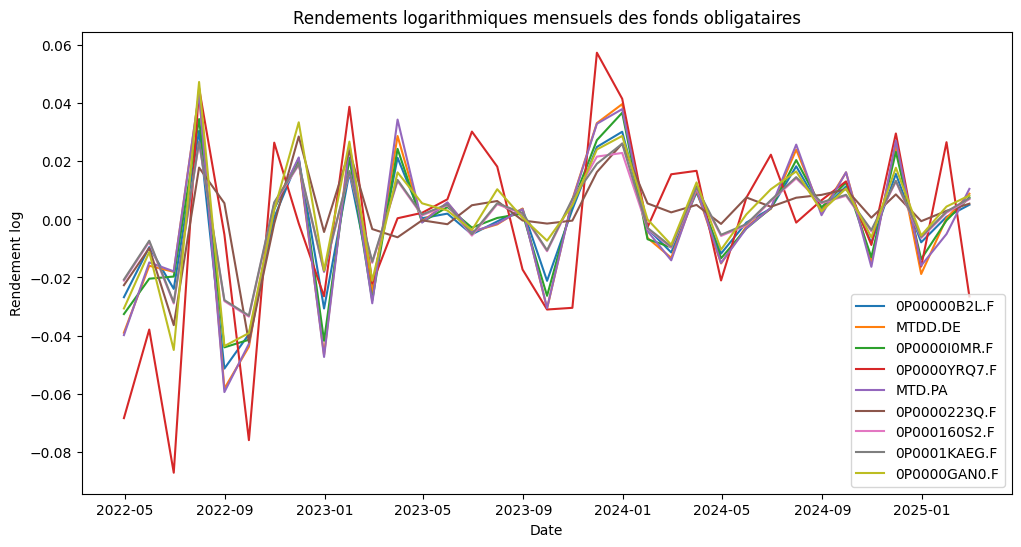

In [ ]:
# Calcul des rendements logarithmiques mensuels
returns_monthly = np.log(adj_close_monthly / adj_close_monthly.shift(1))

# Affichage des rendements calculés
print("Rendements mensuels :")
print(returns_monthly.head())

# Tracer les rendements des fonds
plt.figure(figsize=(12,6))
for col in returns_monthly.columns:
    plt.plot(returns_monthly[col], label=col)
plt.legend()
plt.title("Rendements logarithmiques mensuels des fonds obligataires")
plt.xlabel("Date")
plt.ylabel("Rendement log")
plt.show()




#3 : Analyse de correlation : avec le bon du tresor US (pas pertinent)

<ipython-input-30-e9b3f29491ec>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  us_treasury_10y = us_treasury_10y.resample('M').last()  # Dernière valeur chaque mois


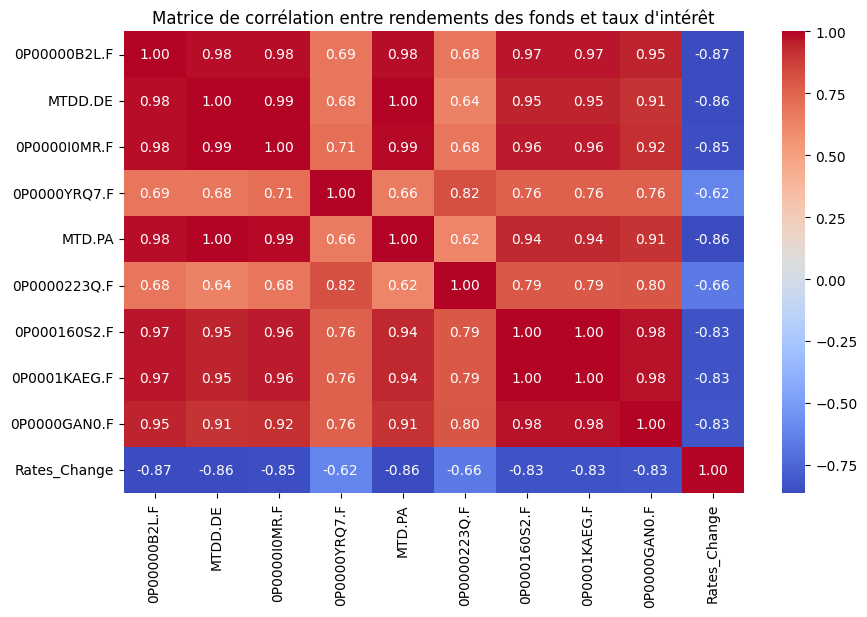

In [ ]:
from pandas_datareader import data as pdr

# Télécharger les taux d'intérêt US 10Y depuis la base de données de la FED
start_date = returns_monthly.index.min().strftime('%Y-%m-%d')
end_date = returns_monthly.index.max().strftime('%Y-%m-%d')

us_treasury_10y = pdr.get_data_fred('DGS10', start_date, end_date)  # Taux en %
us_treasury_10y /= 100  # Convertir en format décimal

# Transformation en variations mensuelles
us_treasury_10y = us_treasury_10y.resample('M').last()  # Dernière valeur chaque mois
rates_changes = us_treasury_10y.pct_change()  # Calcul de la variation mensuelle

# Fusion des rendements des fonds et des variations des taux d'intérêt
merged_data = pd.concat([returns_monthly, rates_changes], axis=1).dropna()
merged_data.columns = list(returns_monthly.columns) + ["Rates_Change"]

# Matrice de corrélation
correlation_matrix = merged_data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et taux d'intérêt")
plt.show()


#3.2 : correlation avec BCE rates et Bund Allemand

### collecte des donnees

### rendements bunds allemands germany 10 year

In [ ]:
!pip install fredapi
import pandas as pd
from pandas_datareader import data as pdr

# Définir les dates de début et de fin pour la collecte des taux
start_date = '2020-01-01'
end_date = '2025-01-01'

# 📌 Récupérer les rendements du Bund 10Y (via FRED)
bund_10y = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)

# Utilisation de la dernière donnée mensuelle
bund_10y = bund_10y.resample('M').last()

# Renommer la colonne correctement avec un dictionnaire
bund_10y = bund_10y.rename(columns={"IRLTLT01DEM156N": "Bund_10Y"})

# Affichage des résultats
print("📌 Rendement Bund 10Y :")
print(bund_10y)


📌 Rendement Bund 10Y :
            Bund_10Y
DATE                
2020-01-31 -0.313636
2020-02-29 -0.466000
2020-03-31 -0.541364
2020-04-30 -0.449500
2020-05-31 -0.516500
...              ...
2024-09-30  2.167143
2024-10-31  2.229565
2024-11-30  2.305714
2024-12-31  2.178889
2025-01-31  2.486190

[61 rows x 1 columns]


<ipython-input-108-0e6c362c3971>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bund_10y = bund_10y.resample('M').last()


### taux bund allemand, a mettre en mensuel

In [ ]:
bund_10y_rates = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)  # Assure-toi que la série correspond aux taux
print(bund_10y_rates)

            IRLTLT01DEM156N
DATE                       
2020-01-01        -0.313636
2020-02-01        -0.466000
2020-03-01        -0.541364
2020-04-01        -0.449500
2020-05-01        -0.516500
...                     ...
2024-09-01         2.167143
2024-10-01         2.229565
2024-11-01         2.305714
2024-12-01         2.178889
2025-01-01         2.486190

[61 rows x 1 columns]


#3.3 extraction taux BCE

In [ ]:
import pandas as pd

# Remplace 'ton_fichier.csv' par le nom de ton fichier téléchargé
file_path = '/content/ECB Data Portal_20250310172744.csv'

# Lire le fichier CSV avec le bon séparateur
df = pd.read_csv(file_path, sep=';')

# Convertir la colonne "Date" en datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# S'assurer que "Date" est utilisée comme index
df.set_index('Date', inplace=True)

# Filtrer pour la période entre mars 2022 et mars 2025
df_filtered = df[(df.index >= '2022-03-01') & (df.index <= '2025-03-31')]

# Regrouper par mois et prendre la dernière valeur de chaque mois
df_month_end = df_filtered.resample('M').last()

# Diviser la colonne 'Rate' par 100 (car ce sont des pourcentages)
df_month_end['Rate'] = df_month_end['Rate'] / 100

# Afficher les résultats pour vérifier
print(df_month_end[['Rate']])  # Afficher seulement la colonne 'Rate' après division


               Rate
Date               
2022-03-31 -0.00593
2022-04-30 -0.00586
2022-05-31 -0.00589
2022-06-30 -0.00591
2022-07-31 -0.00091
2022-08-31 -0.00091
2022-09-30  0.00642
2022-10-31  0.00648
2022-11-30  0.01391
2022-12-31  0.01890
2023-01-31  0.01894
2023-02-28  0.02388
2023-03-31  0.02884
2023-04-30  0.02894
2023-05-31  0.03144
2023-06-30  0.03400
2023-07-31  0.03392
2023-08-31  0.03646
2023-09-30  0.03880
2023-10-31  0.03882
2023-11-30  0.03891
2023-12-31  0.03882
2024-01-31  0.03894
2024-02-29  0.03887
2024-03-31  0.03899
2024-04-30  0.03889
2024-05-31  0.03892
2024-06-30  0.03656
2024-07-31  0.03653
2024-08-31  0.03654
2024-09-30  0.03410
2024-10-31  0.03155
2024-11-30  0.03163
2024-12-31  0.02905
2025-01-31  0.02912
2025-02-28  0.02658
2025-03-31  0.02665


<ipython-input-102-a97fe183aae5>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month_end = df_filtered.resample('M').last()


### Ici on fait la matrice sans le graphique, que du texte : correlation entre fonds et taux BCE

In [ ]:
import pandas as pd

# Assumons que df_month_end et returns_monthly sont déjà définis dans ton environnement

# Afficher les premières lignes des deux dataframes pour s'assurer qu'ils sont correctement formatés
print("Premières lignes des taux de la BCE :")
print(df_month_end[['Rate']].head())

print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# S'assurer que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# On peut soit les aligner sur l'index, soit utiliser une fusion (ici on utilise l'index Date)
df_combined = pd.merge(df_month_end[['Rate']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les taux de la BCE et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)


Premières lignes des taux de la BCE :
               Rate
Date               
2022-03-31 -0.00593
2022-04-30 -0.00586
2022-05-31 -0.00589
2022-06-30 -0.00591
2022-07-31 -0.00091
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043497      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078

## Matrice correlation taux BCE Court Terme et fonds

Premières lignes des taux de la BCE :
               Rate
Date               
2022-03-31 -0.00593
2022-04-30 -0.00586
2022-05-31 -0.00589
2022-06-30 -0.00591
2022-07-31 -0.00091
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043497      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078

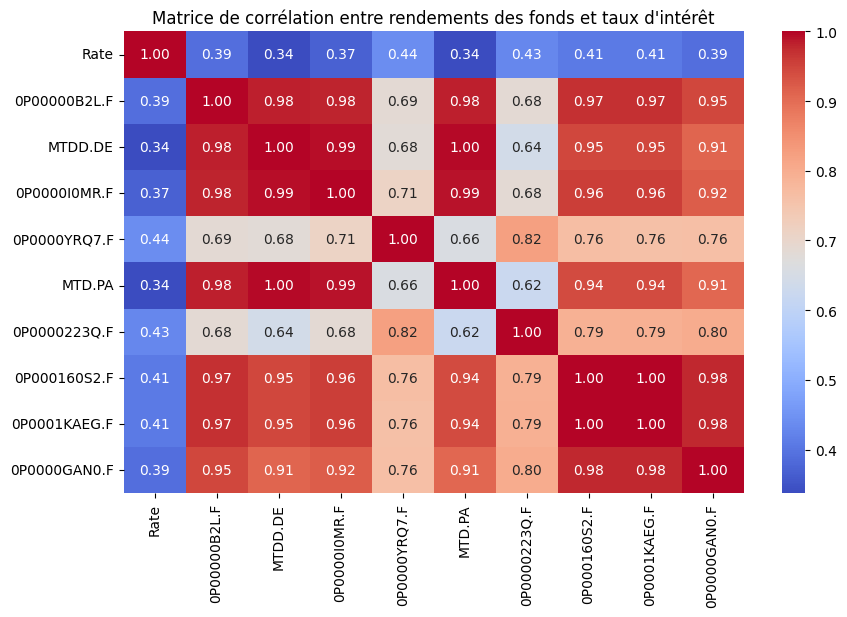

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumons que df_month_end et returns_monthly sont déjà définis dans ton environnement

# Afficher les premières lignes des deux dataframes pour s'assurer qu'ils sont correctement formatés
print("Premières lignes des taux de la BCE :")
print(df_month_end[['Rate']].head())

print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# S'assurer que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# On peut soit les aligner sur l'index, soit utiliser une fusion (ici on utilise l'index Date)
df_combined = pd.merge(df_month_end[['Rate']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les taux de la BCE et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et taux d'intérêt")
plt.show()


## Matrice Bond Allemand 10y

<ipython-input-109-c1cf751c6b67>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bund_10y = bund_10y.resample('M').last()


📌 Rendement Bund 10Y :
            Bund_10Y
DATE                
2020-01-31 -0.313636
2020-02-29 -0.466000
2020-03-31 -0.541364
2020-04-30 -0.449500
2020-05-31 -0.516500
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043497      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078     -0.

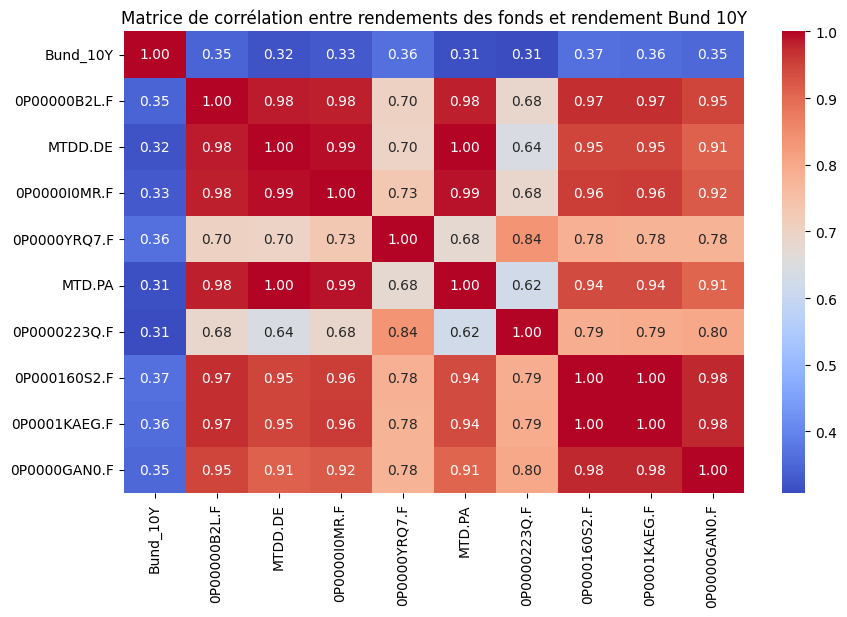

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les dates de début et de fin pour la collecte des taux
start_date = '2020-01-01'
end_date = '2025-01-01'

# 📌 Récupérer les rendements du Bund 10Y (via FRED)
bund_10y = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)

# Utilisation de la dernière donnée mensuelle
bund_10y = bund_10y.resample('M').last()

# Renommer la colonne correctement avec un dictionnaire
bund_10y = bund_10y.rename(columns={"IRLTLT01DEM156N": "Bund_10Y"})

# Afficher les premières lignes des rendements du Bund 10Y
print("📌 Rendement Bund 10Y :")
print(bund_10y.head())

# Assumons que returns_monthly contient les rendements mensuels des fonds (déjà défini dans ton environnement)

# Afficher les premières lignes des rendements des fonds
print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# S'assurer que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# Fusionner les DataFrames sur l'index de la Date
df_combined = pd.merge(bund_10y[['Bund_10Y']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les rendements du Bund 10Y et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et rendement Bund 10Y")
plt.show()


#4 : analyse de causalité de Granger

In [ ]:
#code a faire

#5 : Modelisation GARCH sur 1 fonds

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005837. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                MTDD.DE   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.029
Vol Model:                      GARCH   Log-Likelihood:                82.6964
Distribution:                  Normal   AIC:                          -159.393
Method:            Maximum Likelihood   BIC:                          -154.727
                                        No. Observations:                   35
Date:                Mon, Mar 10 2025   Df Residuals:                       35
Time:                        15:25:32   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.3623e-04  1.570e-04      0.868      0.386 

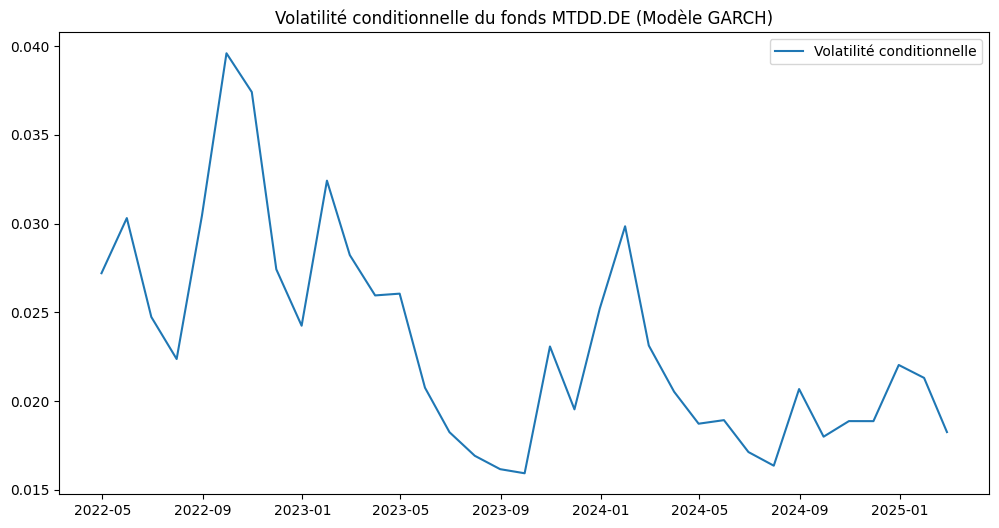

In [ ]:
# Sélectionner un fonds pour l'analyse GARCH
selected_fund = "MTDD.DE"  # Exemple avec Amundi Euro Gov Bond 7-10Y
returns = returns_monthly[selected_fund].dropna()

# Modèle GARCH(1,1)
model = arch_model(returns, vol="Garch", p=1, q=1, mean="Zero", dist="normal")

# Ajustement du modèle
garch_results = model.fit(disp="off")

# Affichage des résultats
print(garch_results.summary())

# Visualisation de la volatilité conditionnelle
plt.figure(figsize=(12,6))
plt.plot(garch_results.conditional_volatility, label="Volatilité conditionnelle")
plt.title(f"Volatilité conditionnelle du fonds {selected_fund} (Modèle GARCH)")
plt.legend()
plt.show()



# 5.2 : GARCH sur l'ensemble de l'analyse

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003529. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005837. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarn

✅ GARCH(1,1) ajusté pour 0P00000B2L.F
✅ GARCH(1,1) ajusté pour MTDD.DE
✅ GARCH(1,1) ajusté pour 0P0000I0MR.F
✅ GARCH(1,1) ajusté pour 0P0000YRQ7.F
✅ GARCH(1,1) ajusté pour MTD.PA
✅ GARCH(1,1) ajusté pour 0P0000223Q.F
✅ GARCH(1,1) ajusté pour 0P000160S2.F
✅ GARCH(1,1) ajusté pour 0P0001KAEG.F
✅ GARCH(1,1) ajusté pour 0P0000GAN0.F

📌 Résumé GARCH pour 0P00000B2L.F :
                       Zero Mean - GARCH Model Results                        
Dep. Variable:           0P00000B2L.F   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.029
Vol Model:                      GARCH   Log-Likelihood:                92.6223
Distribution:                  Normal   AIC:                          -179.245
Method:            Maximum Likelihood   BIC:                          -174.579
                                        No. Observations:                   35
Date:                Mon, Mar 10 2025   Df Residuals:                       35
T

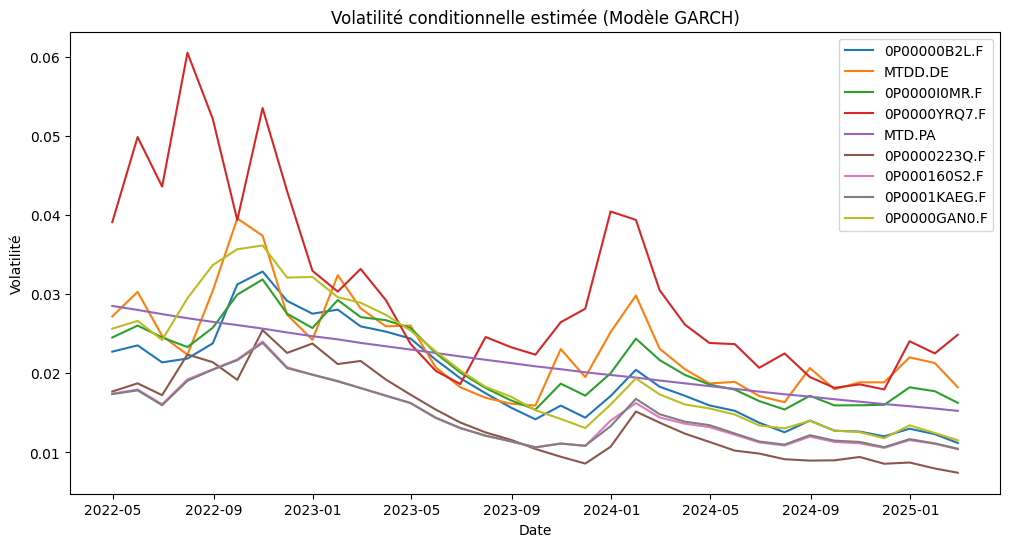

In [ ]:
# Dictionnaire pour stocker les modèles GARCH et volatilités conditionnelles
garch_results_dict = {}
conditional_volatilities = pd.DataFrame()

# Appliquer le modèle GARCH(1,1) à chaque fonds
for fund in returns_monthly.columns:
    try:
        # Sélection des rendements du fonds
        returns = returns_monthly[fund].dropna()

        # Vérifier s'il y a assez de données
        if len(returns) < 20:
            print(f"⚠️ Pas assez de données pour {fund}, GARCH ignoré.")
            continue

        # Définir et ajuster le modèle GARCH(1,1)
        model = arch_model(returns, vol="Garch", p=1, q=1, mean="Zero", dist="normal")
        garch_results = model.fit(disp="off")

        # Stocker les résultats
        garch_results_dict[fund] = garch_results
        conditional_volatilities[fund] = garch_results.conditional_volatility

        print(f"✅ GARCH(1,1) ajusté pour {fund}")

    except Exception as e:
        print(f"❌ Erreur avec {fund}: {e}")

# Affichage des résultats des modèles
for fund, result in garch_results_dict.items():
    print(f"\n📌 Résumé GARCH pour {fund} :")
    print(result.summary())

# Tracer l'évolution des volatilités conditionnelles
plt.figure(figsize=(12,6))
for fund in conditional_volatilities.columns:
    plt.plot(conditional_volatilities[fund], label=fund)

plt.title("Volatilité conditionnelle estimée (Modèle GARCH)")
plt.xlabel("Date")
plt.ylabel("Volatilité")
plt.legend()
plt.show()
